<a href="https://colab.research.google.com/github/joannevarughese/CIT-Capstone/blob/main/Copy_of_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [276]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

In [277]:
df = pd.read_csv('/content/drive/MyDrive/RestaurantRecommendationData/restaurants.csv') #importing dataset

In [278]:
df.describe()

,id,position,score,ratings,lat,lng
count,63469.000000,63469.000000,35302.000000,35302.000000,63469.000000,63469.000000
mean,31735.000000,86.692102,4.551431,74.887060,36.585019,-96.715114
std,18322.066455,79.280129,0.300675,69.874057,6.458959,14.438166
min,1.000000,1.000000,1.300000,10.000000,0.000000,-123.841240
25%,15868.000000,18.000000,4.400000,25.000000,30.442221,-98.569760
50%,31735.000000,61.000000,4.600000,52.000000,34.707265,-96.764330
75%,47602.000000,141.000000,4.800000,100.000000,40.884903,-87.938729
max,63469.000000,300.000000,5.000000,500.000000,48.963950,0.000000


In [279]:
df

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700
...,...,...,...,...,...,...,...,...,...,...,...
63464,63465,2,IHOP (4321 N 10th St),4.6,56.0,"American, Breakfast and Brunch, burger, Comfor...",$,"4321 N 10th St, MC ALLEN, TX, 78504",78504,26.242853,-98.223984
63465,63466,29,Feldman's - N 10th Street,NaN,NaN,NaN,NaN,"3010 N 10th Street, Mc Allen, TX,",NaN,26.230764,-98.224922
63466,63467,27,Feldman's - N 23rd St,NaN,NaN,NaN,NaN,"6101 N 23rd Street #B, Mc Allen, TX,",NaN,26.260353,-98.236755
63467,63468,19,Church's Chicken (620 S. 10th Street),4.3,17.0,"Fast Food, Family Meals",$,"620 S. 10th Street, McAllen, TX, 78501",78501,26.197333,-98.231369


In [280]:
ratings_df = df['ratings']
ratings_df.dropna(inplace=True) #gets rid of NaN values
ratings_df.head()

4     22.0
6     63.0
13    44.0
15    20.0
18    48.0
Name: ratings, dtype: float64

In [281]:
ratings_df.info()

<class 'pandas.core.series.Series'>
Int64Index: 35302 entries, 4 to 63467
Series name: ratings
Non-Null Count  Dtype  
--------------  -----  
35302 non-null  float64
dtypes: float64(1)
memory usage: 551.6 KB


<Axes: xlabel='ratings', ylabel='count'>

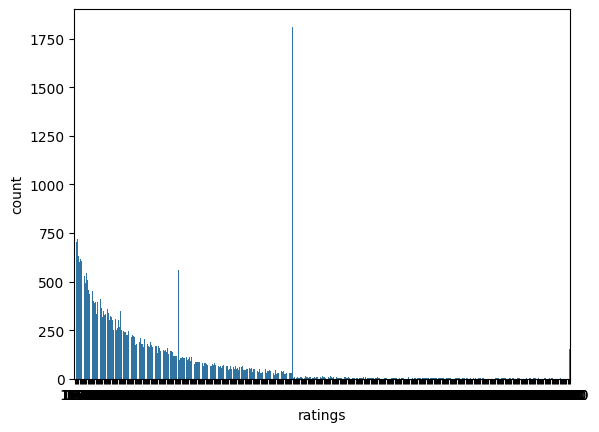

In [282]:
sns.countplot(x=ratings_df)

In [288]:
print("If one of the factors doesn't apply, just hit enter. Also, zip code is mandatory.")
zipCode=input("Enter your zip code: ")
#city= input("Enter you city:")
categoryInput=input("Enter your category of food you're interested to eat. ex:(Chinese, Halal, Seafood, Healthy, Fast Food): ")
priceInput=input("Enter the price range you are looking for ex:($, $$, or $$$?): ")
userScore=input("Do you want a minimum score (1-5): ")
userRatings=input("Do you want a minimum amount of reviews for each restaurants selected: ")

If one of the factors doesn't apply, just hit enter. Also, zip code is mandatory.
Enter your zip code: 23060
Enter your category of food you're interested to eat. ex:(Chinese, Halal, Seafood, Healthy, Fast Food): 
Enter the price range you are looking for ex:($, $$, or $$$?): 
Do you want a minimum score (1-5): 
Do you want a minimum amount of reviews for each restaurants selected: 


In [289]:
filter_list= [zipCode]

filterDF = df.loc[df['zip_code'].isin(filter_list)]
'''
if city != '' :
  filterDF = filterDF[df['full_address'].str.contains(city)==True]
'''

if priceInput != '' :
  filterDF = filterDF[df['price_range'].str.contains(priceInput)==True]

if userScore != '':
  filterDF = filterDF[df['score'] >= float(userScore)]

if userRatings != '':
  filterDF = filterDF[df['ratings'] > int(userRatings)]

if categoryInput != '' :
  filterDF = filterDF[df['category'].str.contains(categoryInput)==True] #adding only what the category of categoryInput

filterDF = filterDF[df['category'].str.contains('Convenience')==False] #taking out any resturants that has that specific value like cafe in category
filterDF = filterDF[df['category'].str.contains('Desserts')==False]
filterDF = filterDF[df['category'].str.contains('Juice')==False]
filterDF = filterDF[df['category'].str.contains('Bakery')==False]
filterDF = filterDF[df['category'].str.contains('Cafe')==False]
#df.loc[df['zip_code']=='23060']

<ipython-input-289-f025fa3427c2>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filterDF = filterDF[df['category'].str.contains('Convenience')==False] #taking out any resturants that has that specific value like cafe in category
<ipython-input-289-f025fa3427c2>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filterDF = filterDF[df['category'].str.contains('Desserts')==False]
<ipython-input-289-f025fa3427c2>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filterDF = filterDF[df['category'].str.contains('Juice')==False]
<ipython-input-289-f025fa3427c2>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filterDF = filterDF[df['category'].str.contains('Bakery')==False]
<ipython-input-289-f025fa3427c2>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filterDF = filterDF[df['category'].str.contains('Cafe')==False]


In [290]:

filterDF

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
23821,23822,56,Nuevo Mexico Restaurante (Richmond - Staples M...,4.4,40.0,Mexican,$$,"10282 Staples Mill Rd, Glen Allen, VA, 23060",23060,37.657375,-77.526215
24522,24523,229,756-Bonefish Grill (11251 W Broad Street),4.7,74.0,"American, Seafood, Family Meals",$$,"11251 W Broad St, Glen Allen, VA, 23060",23060,37.648991,-77.602504
24526,24527,214,Jersey Mike's Subs (Glen Allen) 11444 West Bro...,4.8,96.0,"Sandwich, American",$,"11444 West Broad Street, Glen Allen, VA, 23060",23060,37.653926,-77.608513
24536,24537,180,Padow's Hams and Deli (Innsbrook),4.7,16.0,Deli,$,"4120 Cox Rd, Glen Allen, VA, 23060",23060,37.649464,-77.582765
24553,24554,203,Which Wich,NaN,NaN,Sandwich,$,"2239 Old Brick Rd, Glen Allen, VA, 23060",23060,37.647349,-77.601442
24570,24571,32,Peter Chang (Short Pump),4.7,127.0,"Chinese, Asian, Asian Fusion, Family Friendly",$,"11408 W Broad St, Glen Allen, VA, 23060",23060,37.653481,-77.608209
24572,24573,63,Spice Up Teriyaki,NaN,NaN,"Japanese, Asian, Bowls, Korean, Healthy",$,"10921 West Broad Street F, Glen Allen, VA, 23060",23060,37.646520,-77.585350
24601,24602,176,Kokonut Box,4.8,25.0,"Asian, Asian Fusion, Korean",$,"10921 W Broad St, Glen Allen, VA, 23060",23060,37.646726,-77.585195
24612,24613,133,Zara Mediterranean Charcoal Grill,4.4,112.0,"Mediterranean, Greek, Vegetarian, Healthy",$,"10865 W Broad St, Glen Allen, VA, 23060",23060,37.646532,-77.582646
24622,24623,97,Canasta's Chicken II,4.8,62.0,"Peruvian, Chicken, Salads",NaN,"11424 West Broad Street, Three Chopt, VA, 23060",23060,37.653573,-77.608302


In [291]:
rsltdf = df.query('zip_code=="23233" and category=="Indian"' ) #testing with queries
rsltdf

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng


#first, rating and number of reviews. then, cost. then, cuisine. Next, Take the highest rated resturants and time it with the number of ratings and highest value is best. zip code although is highest ranked and then ratings alone then both rating and number of reviews.

In [292]:
score_df= df['score']
score_df.dropna(inplace=True)
#userInput = input("Enter a : ")
#total_score_df= (score_df.loc[:, "score"] + ratings_df.loc["ratings")
score_df

4        4.7
6        4.7
13       4.6
15       5.0
18       4.9
        ... 
63448    4.8
63460    4.4
63462    5.0
63464    4.6
63467    4.3
Name: score, Length: 35302, dtype: float64

In [293]:
df_length = len(df)
n_scores = len(df['score'].unique())
n_ratings = len(df['ratings'].unique())
print(f"Length of data frame: {df_length}")
print(f"Scores: {n_scores}")
print(f"Ratings: {n_ratings}")
#n_users = len(ratings_df['userId'].unique())

Length of data frame: 63469
Scores: 34
Ratings: 434


In [294]:
mean_rating = filterDF['ratings'].mean() #mean of ratings column
#filterDF.groupby('zip_code')['ratings'].mean()
#.apply(lambda x: x.mean().index[0])
mean_score = filterDF['score'].mean()
print(mean_rating)
print(mean_score)

72.8125
4.63125


In [295]:
m= filterDF['ratings'].quantile(.50)
m

71.0

In [296]:
'''
# loop through the rows using iterrows()
list_ratings = df['ratings'].tolist()
list_score = df['score'].tolist()

for index, row in filterDF.iterrows():
     n_ranking = (list_score[index]*mean_rating)+list_ratings[index]

#def test(x):
for index, row in filterDF.iterrows():
   n_ranking= (row['score']* mean_rating)+row['ratings']
   #df['rankings']=n_ranking
   print(n_ranking)
  # list = df[''].tolist() #can make smth a list
   df.assign(rankings= [n_ranking])
'''
#filterDF['ranking'] = (filterDF['score']*mean_rating)+ filterDF['ratings'] #equation to get final value to determine the best resturant3

filterDF['ranking'] = (filterDF['ratings']/(filterDF['ratings']+ m))* mean_rating + (m/(filterDF['ratings']+m))* mean_score

print(df)

# df.apply(test, axis=1)
   # add the zip code next to the columns that correspond (hopefully instead of ID number)

          id  position                                            name  score  \
0          1        19               PJ Fresh (224 Daniel Payne Drive)    NaN   
1          2         9                  J' ti`'z Smoothie-N-Coffee Bar    NaN   
2          3         6  Philly Fresh Cheesesteaks (541-B Graymont Ave)    NaN   
3          4        17         Papa Murphy's (1580 Montgomery Highway)    NaN   
4          5       162                Nelson Brothers Cafe (17th St N)    4.7   
...      ...       ...                                             ...    ...   
63464  63465         2                           IHOP (4321 N 10th St)    4.6   
63465  63466        29                       Feldman's - N 10th Street    NaN   
63466  63467        27                           Feldman's - N 23rd St    NaN   
63467  63468        19           Church's Chicken (620 S. 10th Street)    4.3   
63468  63469         9                       7-Eleven (1600 S 23rd St)    NaN   

       ratings             

In [297]:
filterDF.dropna(inplace=True) #get rid of NaN values
filterDF = filterDF.sort_values(by = ['ranking', 'score', 'ratings'], ascending=False) #sort the dataset so that best rated places are top to bottom